In [64]:
import pymysql

In [65]:
connection = pymysql.connect(host='localhost',
                                                        user = 'root',
                                                        password='',
                                                        db='pi_sensor',
                                                        charset='utf8',
                                                        cursorclass=pymysql.cursors.DictCursor)

In [66]:
connection.commit()

In [67]:
cur = connection.cursor()

In [68]:
cur.execute('select * from temp_values')

2

In [69]:
rows = cur.fetchall()

In [70]:
rows

[{'date': datetime.date(2017, 4, 8), 'hour': 6},
 {'date': datetime.date(2017, 4, 9), 'hour': 32}]

In [71]:
%matplotlib inline

In [72]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [73]:
frame = DataFrame(rows)

In [74]:
frame

,date,hour
0,2017-04-08,6
1,2017-04-09,32


In [75]:
frame['date']

0    2017-04-08
1    2017-04-09
Name: date, dtype: object

In [76]:
frame['hour']

0     6
1    32
Name: hour, dtype: int64

In [77]:
hours = np.array(frame['hour'])

In [78]:
hours

array([ 6, 32])

In [79]:
ts = pd.Series(hours, index=frame['date'])

In [80]:
ts

date
2017-04-08     6
2017-04-09    32
dtype: int64

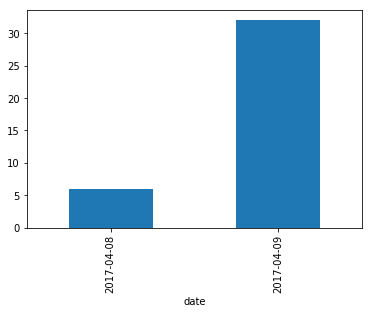

In [81]:
ts.plot(kind='bar')